In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 12.3 MB/s eta 0:00:00


In [ ]:
PATH="/content/drive/MyDrive/fire_detection"
import os
import shutil

In [ ]:
os.chdir(PATH)

In [ ]:
import glob
TR_R=0.9
TE_R=0.1
all_txts=glob.glob("label_imgs/*.txt")
all_txts.remove("label_imgs/classes.txt")
train_txts=all_txts[:int(len(all_txts)*TR_R)]
test_txts=all_txts[int(len(all_txts)*TR_R):]

In [ ]:
os.makedirs("label_imgs/train/images")
os.makedirs("label_imgs/train/labels")
os.makedirs("label_imgs/test/images")
os.makedirs("label_imgs/test/labels")

In [ ]:
[
   ( shutil.move(txt,"label_imgs/train/labels"),
    shutil.move(os.path.splitext(txt)[0]+".png","label_imgs/train/images")

    )
    for txt in train_txts
]


[
   ( shutil.move(txt,"label_imgs/test/labels"),
    shutil.move(os.path.splitext(txt)[0]+".png","label_imgs/test/images")

    )
    for txt in test_txts
]

In [ ]:
with open(glob.glob("label_imgs/*.txt")[0]) as f:
  print(f.read())

stove_on
no_fire
stove_off
fire



In [ ]:
classes = [
    "stove_on",
    "no_fire",
    "stove_off",
    "fire"
]

In [ ]:
data={
    "train":"train/images",
    "val":"test/images",
    "nc":len(classes),
    "names":classes
}

In [ ]:
import yaml
with open("label_imgs/data.yaml","w") as yf:
  yaml.safe_dump(data,yf)

In [ ]:
%cd label_imgs/

/content/drive/MyDrive/fire_detection/label_imgs


In [ ]:
from ultralytics import YOLO
model=YOLO("runs/detect/train5/weights/best.pt")
model.train(data="data.yaml",epochs=20)

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train5/weights/best.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dfd57f51e10>
fitness: 0.9226278767335606
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.90882,     0.91459,     0.91459,     0.92035])
names: {0: 'stove_on', 1: 'no_fire', 2: 'stove_off', 3: 'fire'}
plot: False
results_dict: {'metrics/precision(B)': 0.9992536790950107, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9145865297039562, 'fitness': 0.9226278767335606}
save_dir: PosixPath('runs/detect/train6')
speed: {'preprocess': 0.30567532493954613, 'inference': 2.4206978934151784, 'loss': 0.0006547049870566716, 'postprocess': 0.8757909138997396}

In [ ]:
import yaml


with open("/root/.config/Ultralytics/settings.yaml") as f:
  con=yaml.safe_load(f)
  print(con)
  con["datasets_dir"]="/content/drive/MyDrive/fire_detection/label_imgs"
  with open("/root/.config/Ultralytics/settings.yaml","w") as yf:
    yaml.safe_dump(con,yf)

{'api_key': '', 'clearml': True, 'comet': True, 'datasets_dir': '/content/drive/MyDrive/fire_detection/label_imgs', 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'runs_dir': 'runs', 'settings_version': '0.0.4', 'sync': True, 'tensorboard': True, 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb', 'wandb': True, 'weights_dir': 'weights'}


In [ ]:
model=YOLO("runs/detect/train6/weights/best.pt")

In [ ]:
result=model.predict("/content/f90775f0-4a81-11ee-aa37-e8d0fcc920d2.png")


image 1/1 /content/f90775f0-4a81-11ee-aa37-e8d0fcc920d2.png: 384x640 2 stove_ons, 2 no_fires, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


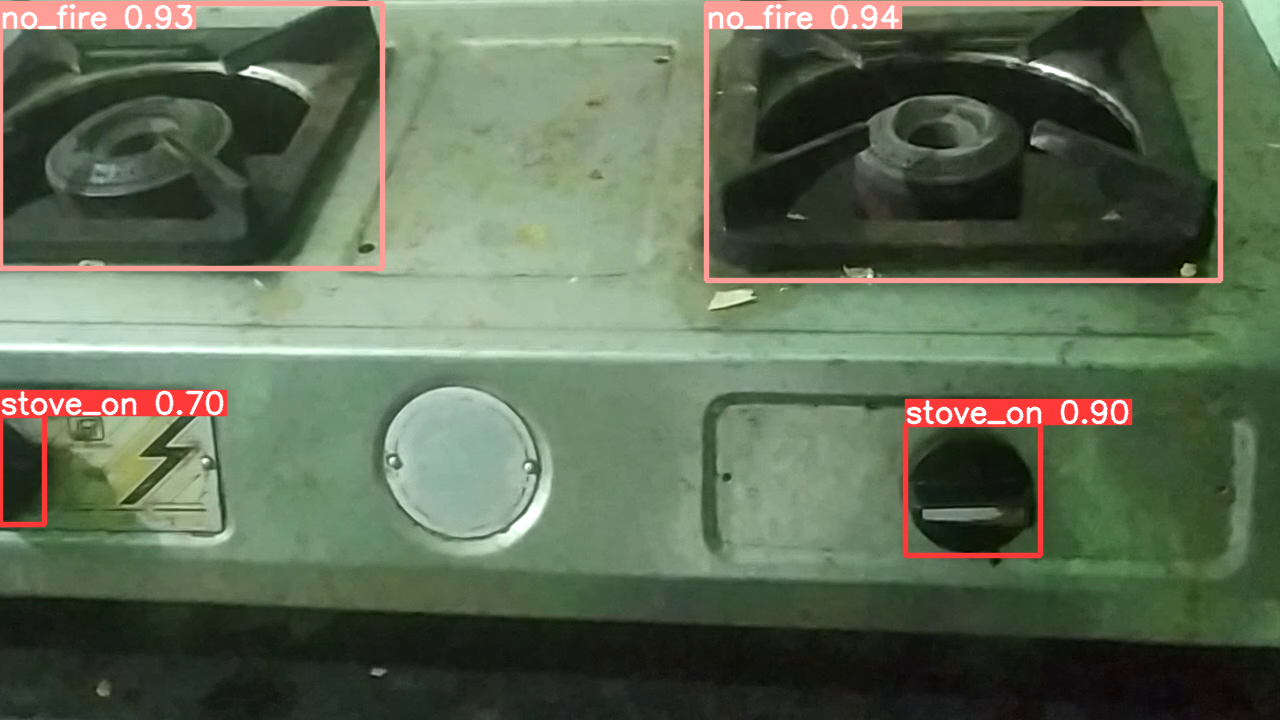

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(result[0].plot())

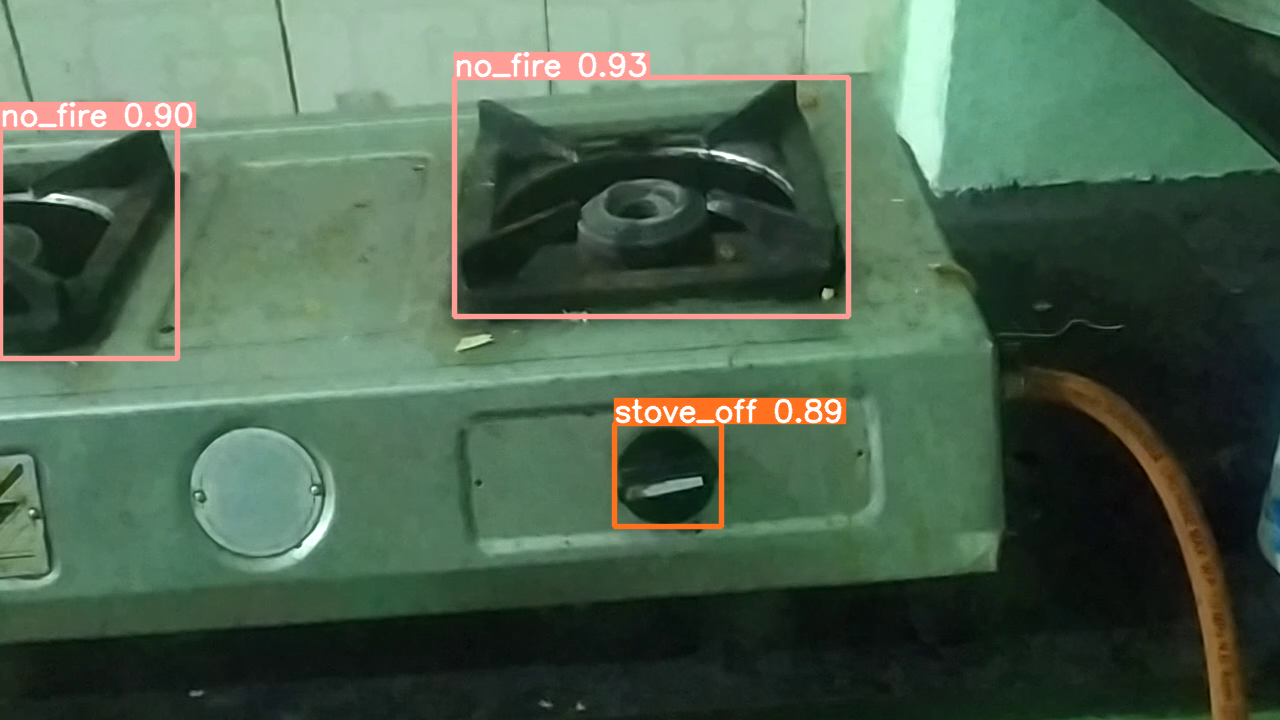

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(result[0].plot())